<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_14_Notebook_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Classificação de Textos e Análise de Sentimentos**
---



A **Classificação de Textos** é uma técnica de PLN que envolve a categorização automática de textos em classes ou rótulos predefinidos com base em seu conteúdo. O objetivo é atribuir um texto a uma ou mais categorias específicas de forma que o texto seja identificado e agrupado conforme suas características e tópicos.

Essa técnica é amplamente utilizada em diversas aplicações, como:

- **Filtragem de Spam:** identificar e classificar e-mails como spam ou não spam.
- **Análise de Sentimento:** classificar textos em categorias como positivo, negativo ou neutro para entender o sentimento expresso.
- **Classificação de Documentos:** categorizar documentos em diferentes tópicos ou áreas de interesse, como notícias, esportes ou tecnologia.
- **Rotulagem de Dados:** atribuir *tags* a conteúdos com base em temas ou interesses.

**Análise de Sentimentos** é uma técnica de PLN que visa identificar e extrair opiniões e emoções expressas em um texto. O objetivo é entender a atitude do autor em relação a um determinado assunto, produto ou serviço, determinando se o sentimento expresso é positivo, negativo ou neutro.

**Tipos de Análise de Sentimentos:**

1. **Análise Binária:**
   - **Positivo vs. Negativo:** classifica o texto como positivo ou negativo, sem considerar nuances adicionais.

2. **Análise de Polaridade:**
   - **Positivo, Negativo e Neutro:** identifica se o sentimento é positivo, negativo ou neutro, permitindo uma visão mais equilibrada.

3. **Análise de Escala (ou Gradual):**
   - **Escalas de Intensidade:** avalia o grau de sentimento, como muito positivo, positivo, neutro, negativo e muito negativo. Pode fornecer uma análise mais detalhada sobre a intensidade do sentimento.

4. **Análise baseada em Aspectos:**
   - **Aspectos Específicos:** identifica sentimentos em relação a diferentes aspectos de um produto ou serviço, como qualidade, preço, atendimento ao cliente etc. Isso ajuda a entender quais áreas são mais valorizadas ou criticadas.

5. **Detecção de Emoções:**
   - **Identificação de Emoções Específicas:** classifica o texto com base em emoções específicas, como alegria, tristeza, raiva, surpresa etc. Fornece uma visão mais detalhada do estado emocional expresso.

Cada tipo de análise de sentimentos tem suas aplicações e pode ser escolhida com base nas necessidades específicas da análise e na complexidade dos dados textuais.

#### **LangChain**

In [ ]:
#@title Instalando o pacote LangChain
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 705.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
#@title Versão do LangChain

import langchain

print(langchain.__version__)

0.2.13


In [ ]:
#@title Integração com o pacote da OpenAI

!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
#@title Definindo a chave da API da OpenAI

import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### **Exemplos**

**Classificar Texto em Rótulos**

*Tagging* significa rotular um documento com classes como:

- sentimento
- idioma
- estilo (formal, informal etc.)
- tópicos abordados
- tendência política

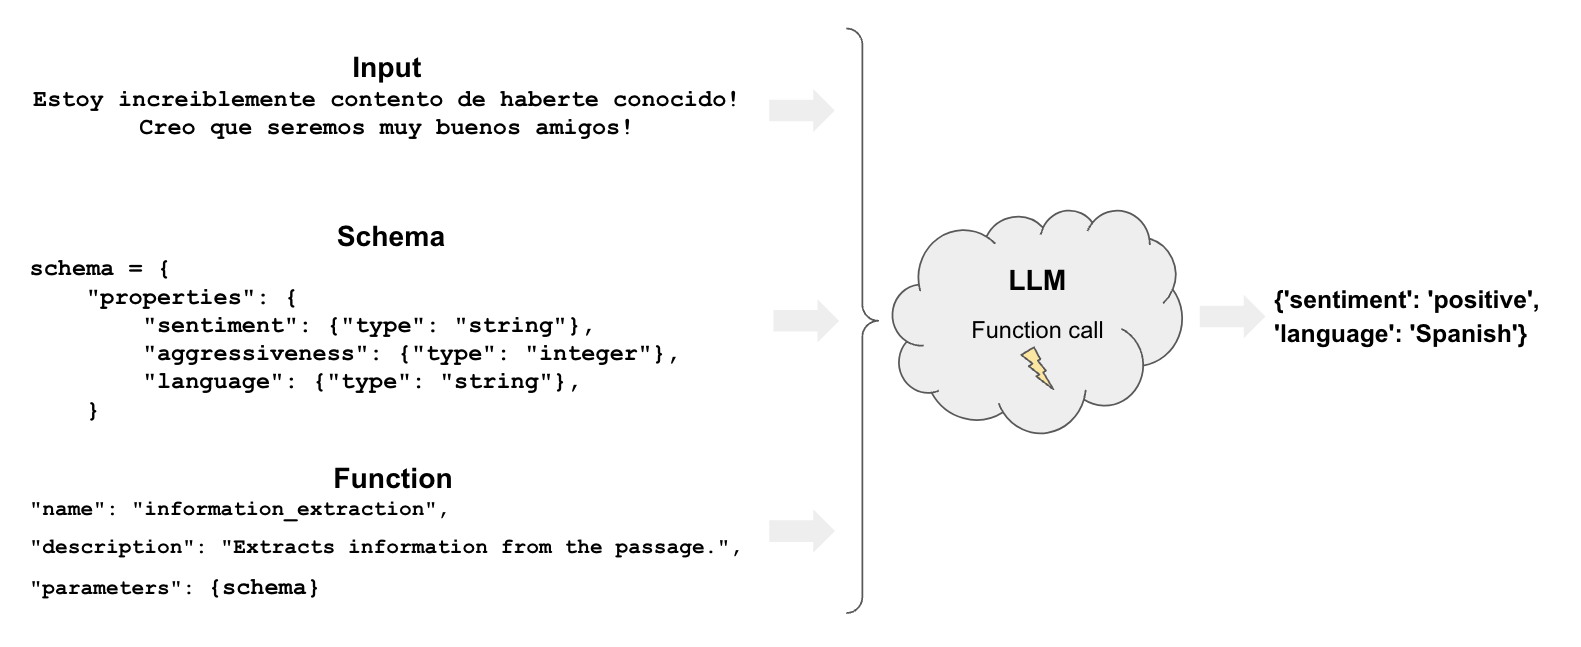

**Tagging possui alguns componentes:**

- **função**: assim como na extração, o *tagging* usa funções para especificar como o modelo deve rotular um documento.
- **esquema**: define como queremos rotular o documento.

Vamos ver um exemplo muito simples de como podemos usar a chamada de ferramenta OpenAI para *tagging* no **LangChain**. Utilizaremos o método `with_structured_output` suportado pelos modelos OpenAI:

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_template(
    """
Extraia as informações desejadas do seguinte texto.

Extraia apenas as propriedades mencionadas na função 'Classificacao'.

Texto:
{input}
"""
)

In [ ]:
class Classificacao(BaseModel):
    sentimento: str = Field(description="O sentimento do texto")
    agressividade: int = Field(
        description="O quão agressivo o texto é em uma escala de 1 a 10"
    )
    idioma: str = Field(description="O idioma em que o texto está escrito")

In [ ]:
modelo = ChatOpenAI(temperature=0, model="gpt-4o-mini").with_structured_output(Classificacao)

chain = prompt | modelo

In [ ]:
texto = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"
chain.invoke({"input": texto})

Classificacao(sentimento='positivo', agressividade=1, idioma='espanhol')

Se quisermos a saída em JSON, podemos simplesmente chamar `.dict()`:

In [ ]:
texto = "Estoy muy enojado con vos! Te voy a dar tu merecido!"

resposta = chain.invoke({"input": texto})
resposta.dict()

{'sentimento': 'enojado', 'agressividade': 8, 'idioma': 'espanhol'}

**Controle mais preciso**

Uma definição cuidadosa do esquema nos dá mais controle sobre a saída do modelo.

Especificamente, podemos definir:

- valores possíveis para cada propriedade
- descrição para garantir que o modelo entenda a propriedade
- propriedades obrigatórias a serem retornadas

Vamos redefinir nosso modelo `Pydantic` para controlar cada um dos aspectos mencionados anteriormente:

In [ ]:
class Classificacao(BaseModel):
    sentimento: str = Field(..., enum=["feliz", "neutro", "triste"])
    agressividade: int = Field(
        ...,
        description="descreve o quão agressiva é a afirmação; quanto maior o número, mais agressiva",
        enum=[1, 2, 3, 4, 5],
    )
    idioma: str = Field(
        ..., enum=["Espanhol", "Inglês", "Francês", "Alemão", "Italiano", "Português"]
    )

In [ ]:
prompt = ChatPromptTemplate.from_template(
    """
Extraia as informações desejadas do seguinte texto.

Extraia apenas as propriedades mencionadas na função 'Classificacao'.

Texto:
{input}
"""
)

modelo = ChatOpenAI(temperature=0, model="gpt-4o-mini").with_structured_output(Classificacao)

chain = prompt | modelo

In [ ]:
texto = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"
chain.invoke({"input": texto})

Classificacao(sentimento='feliz', agressividade=1, idioma='Espanhol')

In [ ]:
texto = "Estoy muy enojado con vos! Te voy a dar tu merecido!"
chain.invoke({"input": texto})

Classificacao(sentimento='triste', agressividade=5, idioma='Espanhol')

In [ ]:
texto = "Weather is ok here, I can go outside without much more than a coat"
chain.invoke({"input": texto})

Classificacao(sentimento='neutro', agressividade=1, idioma='Inglês')

In [ ]:
texto = "O tempo está bom aqui, eu posso sair sem precisar de mais do que um casaco"
chain.invoke({"input": texto})

Classificacao(sentimento='feliz', agressividade=1, idioma='Português')

***Tagger* de Metadados OpenAI**

Pode ser útil rotular documentos ingeridos com metadados estruturados, como o título, tom ou comprimento de um documento, para permitir uma busca por similaridade mais direcionada posteriormente. No entanto, para um grande número de documentos, realizar esse processo de rotulagem manualmente pode ser tedioso.

O `OpenAIMetadataTagger` é um transformador de documentos que automatiza esse processo extraindo metadados de cada documento fornecido de acordo com um esquema fornecido.

Por exemplo, vamos supor que você queira indexar um conjunto de críticas de filmes. Você poderia inicializar o transformador de documentos com um objeto JSON Schema válido da seguinte forma:

In [ ]:
!pip install -qU langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_transformers.openai_functions import (
    create_metadata_tagger,
)
from langchain_core.documents import Document
from langchain_openai import ChatOpenAI

In [ ]:
esquema = {
    "properties": {
        "titulo_filme": {"type": "string"},
        "critico": {"type": "string"},
        "tom": {"type": "string", "enum": ["positivo", "negativo"]},
        "avaliacao": {
            "type": "integer",
            "description": "O número de estrelas que o crítico deu para o filme",
        },
    },
    "required": ["titulo_filme", "critico", "tom"],
}


# deve ser um modelo OpenAI que suporte funções
modelo = ChatOpenAI(temperature=0, model="gpt-4o-mini")

transformador_documento = create_metadata_tagger(metadata_schema = esquema, llm = modelo)

In [ ]:
transformador_documento

OpenAIMetadataTagger(tagging_chain=LLMChain(prompt=ChatPromptTemplate(input_variables=['input'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template="Extract the desired information from the following passage.\n\nOnly extract the properties mentioned in the 'information_extraction' function.\n\nPassage:\n{input}\n"))]), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x78592cb107c0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x785923f5cdf0>, root_client=<openai.OpenAI object at 0x78592cd066b0>, root_async_client=<openai.AsyncOpenAI object at 0x78592cb10730>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy=''), output_parser=JsonOutputFunctionsParser(), llm_kwargs={'functions': [{'name': 'information_extraction', 'description': 'Extracts the relevant information from the passage.', 'parameters': {'type': 'object', 'properties': {'titu

Você pode então simplesmente passar ao transformador de documentos uma lista de documentos, e ele extrairá os metadados do conteúdo:

In [ ]:
documentos = [
    Document(
        page_content="Crítica de The Bee Movie\nPor Roger Ebert\n\nEste é o melhor filme já feito. 4 de 5 estrelas."
    ),
    Document(
        page_content="Crítica de O Poderoso Chefão\nPor Anônimo\n\nEste filme foi super entediante. 1 de 5 estrelas.",
        metadata={"confiável": False},
    ),
]

resposta = transformador_documento.transform_documents(documentos)

In [ ]:
resposta

[Document(metadata={'titulo_filme': 'The Bee Movie', 'critico': 'Roger Ebert', 'tom': 'positivo', 'avaliacao': 4}, page_content='Crítica de The Bee Movie\nPor Roger Ebert\n\nEste é o melhor filme já feito. 4 de 5 estrelas.'),
 Document(metadata={'titulo_filme': 'O Poderoso Chefão', 'critico': 'Anônimo', 'tom': 'negativo', 'avaliacao': 1, 'confiável': False}, page_content='Crítica de O Poderoso Chefão\nPor Anônimo\n\nEste filme foi super entediante. 1 de 5 estrelas.')]

In [ ]:
import json

print(
    *[d.page_content + "\n\n" + json.dumps(d.metadata) for d in resposta],
    sep="\n\n---------------\n\n",
)

Crítica de The Bee Movie
Por Roger Ebert

Este é o melhor filme já feito. 4 de 5 estrelas.

{"titulo_filme": "The Bee Movie", "critico": "Roger Ebert", "tom": "positivo", "avaliacao": 4}

---------------

Crítica de O Poderoso Chefão
Por Anônimo

Este filme foi super entediante. 1 de 5 estrelas.

{"titulo_filme": "O Poderoso Chef\u00e3o", "critico": "An\u00f4nimo", "tom": "negativo", "avaliacao": 1, "confi\u00e1vel": false}


Você também pode inicializar o transformador de documentos com um esquema `Pydantic`:

In [ ]:
from typing import Literal

from pydantic import BaseModel, Field

class Propriedades(BaseModel):
    titulo_filme: str
    critico: str
    tom: Literal["positivo", "negativo"]
    avaliacao: int = Field(description="Avaliação de 5 estrelas")

In [ ]:
transformador_documento = create_metadata_tagger(Propriedades, modelo)
resposta = transformador_documento.transform_documents(documentos)

print(
    *[d.page_content + "\n\n" + json.dumps(d.metadata) for d in resposta],
    sep="\n\n---------------\n\n",
)

Crítica de The Bee Movie
Por Roger Ebert

Este é o melhor filme já feito. 4 de 5 estrelas.

{"titulo_filme": "The Bee Movie", "critico": "Roger Ebert", "tom": "positivo", "avaliacao": 4}

---------------

Crítica de O Poderoso Chefão
Por Anônimo

Este filme foi super entediante. 1 de 5 estrelas.

{"titulo_filme": "O Poderoso Chef\u00e3o", "critico": "An\u00f4nimo", "tom": "negativo", "avaliacao": 1, "confi\u00e1vel": false}


In [ ]:
for d in resposta:
    print(d.metadata)

{'titulo_filme': 'The Bee Movie', 'critico': 'Roger Ebert', 'tom': 'positivo', 'avaliacao': 4}
{'titulo_filme': 'O Poderoso Chefão', 'critico': 'Anônimo', 'tom': 'negativo', 'avaliacao': 1, 'confiável': False}


**Análise de Sentimentos**

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.prompts import ChatPromptTemplate
from langchain.prompts import HumanMessagePromptTemplate

prompt_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content=(
                "retorne o sentimento do texto fornecido no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."
            )
        ),
        HumanMessagePromptTemplate.from_template("{texto}"),
    ]
)

mensagens =  prompt_template.format_messages(texto="Eu não gosto do tempo hoje.")

In [ ]:
mensagens

[SystemMessage(content="retorne o sentimento do texto fornecido no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."),
 HumanMessage(content='Eu não gosto do tempo hoje.')]

In [ ]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [ ]:
resposta = modelo.invoke(mensagens)

In [ ]:
resposta

AIMessage(content='```json\n{\n  "sentimento": "negativo"\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 44, 'total_tokens': 59}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_507c9469a1', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22ebc42-5120-49b0-9d00-7fb0a5b68223-0', usage_metadata={'input_tokens': 44, 'output_tokens': 15, 'total_tokens': 59})

In [ ]:
resposta.content

'```json\n{\n  "sentimento": "negativo"\n}\n```'

In [ ]:
from langchain_core.output_parsers import JsonOutputParser

chain =  modelo | JsonOutputParser()

sentimento = chain.invoke(mensagens)

print(sentimento)

{'sentimento': 'negativo'}


Um exemplo com vários textos para serem analisados:

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.prompts import ChatPromptTemplate
from langchain.prompts import HumanMessagePromptTemplate

prompt_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content=(
                "retorne o sentimento dos textos fornecidos no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."
            )
        ),
        HumanMessagePromptTemplate.from_template("{texto}"),
    ]
)

textos = [
    "Estou muito feliz com o progresso no trabalho hoje.",
    "A comida estava horrível e o atendimento foi péssimo.",
    "O clima está perfeito para uma caminhada ao ar livre.",
    "Sinto-me frustrado com o atraso no projeto.",
    "O filme que assisti ontem foi absolutamente incrível."
]

# formata as mensagens para cada texto usando o template
mensagens = [prompt_template.format_messages(texto=texto) for texto in textos]

# exibe as mensagens formatadas para cada texto
for i, mensagem in enumerate(mensagens):
    print(f"Texto {i + 1}: {mensagem}")

Texto 1: [SystemMessage(content="retorne o sentimento dos textos fornecidos no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."), HumanMessage(content='Estou muito feliz com o progresso no trabalho hoje.')]
Texto 2: [SystemMessage(content="retorne o sentimento dos textos fornecidos no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."), HumanMessage(content='A comida estava horrível e o atendimento foi péssimo.')]
Texto 3: [SystemMessage(content="retorne o sentimento dos textos fornecidos no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."), HumanMessage(content='O clima está perfeito para uma caminhada ao ar livre.')]
Texto 4: [SystemMessage(content="retorne o sentimento dos textos fornecidos no formato JSON. O valor do sentimento pode ser 'negativo' ou 'positivo'."), HumanMessage(content='Sinto-me frustrado com o atraso no projeto.')]
Texto 5: [SystemMessage(content="retorne o sentimento dos textos fornecidos no forma

In [ ]:
from langchain_core.output_parsers import JsonOutputParser

chain =  modelo | JsonOutputParser()

for mensagem in mensagens:
    print(chain.invoke(mensagem))

{'sentimento': 'positivo'}
{'sentimento': 'negativo'}
{'sentimento': 'positivo'}
{'sentimento': 'negativo'}
{'sentimento': 'positivo'}


## **Referências**

> https://python.langchain.com/v0.2/docs/tutorials/classification/

> https://python.langchain.com/v0.2/docs/integrations/document_transformers/openai_metadata_tagger/

> https://www.geeksforgeeks.org/what-is-sentiment-analysis/


>